# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np 
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def my_mean(elems):
  return sum(elems)/len(elems)

def my_variance(elems):
  mean = my_mean(elems)
  sum_differences_squared = sum(list(map(lambda x: (x-mean)**2, elems)))
  return sum_differences_squared / (len(elems)-1) 

def my_standard_deviation(elems):
  variance = my_variance(elems)
  return variance**(1/2)

print("my mean:", my_mean(sales), "Numpy mean", np.mean(sales))
print("my variance:", my_variance(sales), "Numpy Variance", 
      np.var(sales, ddof=1))
print("My std:", my_standard_deviation(sales), "Numpy std", 
      np.std(sales, ddof=1))

my mean: 3052.714285714286 Numpy mean 3052.714285714286
my variance: 214387.90476190473 Numpy Variance 214387.90476190473
My std: 463.0204150595357 Numpy std 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
sales_two = [127, 80, 105, 92, 120, 115, 93]

def my_covariance(elems, elems_two):
  mean_x = my_mean(elems)
  mean_y = my_mean(elems_two)
  sum_product_differences = sum(list(map(lambda x,y: (x-mean_x)*(y-mean_y), elems, elems_two)))
  std_x = my_standard_deviation(elems)
  std_y = my_standard_deviation(elems_two)
  return sum_product_differences / (len(elems)-1)

print("My cov:", my_covariance(sales, sales_two), "Numpy cov:", np.cov(sales, sales_two, ddof=1)[0][1])

My cov: 7604.357142857142 Numpy cov: 7604.357142857142


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
def my_correlation_coefficient(elems, elems_two):
  cov = my_covariance(elems, elems_two)
  std_x = my_standard_deviation(elems)
  std_y = my_standard_deviation(elems_two)
  return cov / (std_x*std_y)

print('my corr:', my_correlation_coefficient(sales, sales_two), 'numpy corr:', 
      np.corrcoef(sales, sales_two, ddof=1)[0][1])

my corr: 0.9628339778148909 numpy corr: 0.9628339778148909


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: bias and ddof have no effect and are deprecated
  


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
# reseting index to be the unnamed column
df.set_index(df.columns[0], inplace=True)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
Unnamed: 0,,,,,,,,,,,,,,,
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

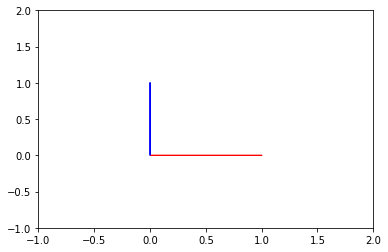

In [0]:
import matplotlib.pyplot as plt 

vector_1 = [1, 0]
vector_2 = [0, 1]

plt.arrow(0, 0, vector_1[0], vector_1[1], color='red')
plt.arrow(0, 0, vector_2[0], vector_2[1], color='blue')
plt.xlim((-1, 2))
plt.ylim((-1, 2))
plt.show()

# orthogonal is perpendicular but applies to any n dimensions 

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])
a.dot(b)

-40

They are not orthogonal because their dot product isn't 0. 

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2, -15, 6, 20])
print(np.linalg.norm(c)**2)
print(c.dot(c))
print(c.T.dot(c))

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} + -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4, 12, 11, 9, 2])
norm = np.linalg.norm(f)
f = f / norm 
np.linalg.norm(f)

0.9999999999999999

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

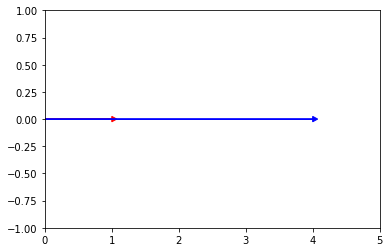

In [0]:
# dependent 
one = [1, 0]
two = [4, 0]
plt.arrow(0, 0, one[0], one[1], color='red', head_width=.05)
plt.arrow(0, 0, two[0], two[1], color='blue', head_width=.05)
plt.xlim((0, 5))
plt.ylim((-1, 1))
plt.show()

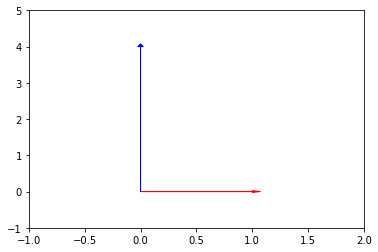

In [0]:
# independent 
one = [1, 0]
two = [0, 4]
plt.arrow(0, 0, one[0], one[1], color='red', head_width=.05)
plt.arrow(0, 0, two[0], two[1], color='blue', head_width=.05)
plt.xlim((-1, 2))
plt.ylim((-1, 5))
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
matrix = np.array([[1, 4], 
                   [2, 8]])
np.linalg.matrix_rank(matrix)

1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
matrix = np.array([[1, -1, 4],
                   [2, 0, 8],
                   [3, 7, 2]])
print(np.linalg.matrix_rank(matrix))
matrix = np.array([[1, 2, 3],
                   [-1, 0, 7],
                   [4, 8, 2]])
np.linalg.matrix_rank(matrix)

3


3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



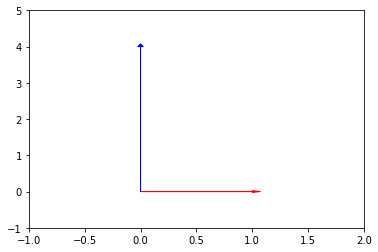

In [0]:
one = [1, 0]
two = [0, 4]
plt.arrow(0, 0, one[0], one[1], color='red', head_width=.05)
plt.arrow(0, 0, two[0], two[1], color='blue', head_width=.05)
plt.xlim((-1, 2))
plt.ylim((-1, 5))
plt.show()

## 6.2 What does it mean to form a basis?

A basis is a set of vectors that are all linearly dependent. This allows these vectors (in this case 2 vectors) span as many dimensions as there are vectors. 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
P = np.array([[1, 2, 3],
              [-1, 0, 7],
              [4, 8, 2]])
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The rank tells us the amount of independent columns the matrix contains. Could also be considered as the number of dimensions the column vectors span. 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

[0.5 1.5]


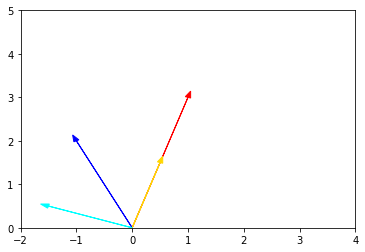

In [61]:
import matplotlib.pyplot as plt 
import numpy as np 

def get_c(v, x):
  """x is the vector that v is beign projected 
  onto """
  c = x.dot(v) / v.dot(v)
  return c 

def get_projection(v, x):
  c = get_c(v, x)
  return c * v 

v = np.array([1, 3])
w = np.array([-1, 2])
projection = get_projection(v, w)
test = w-projection 
print(projection)

plt.arrow(0, 0, v[0], v[1], color='red', head_width=.1)
plt.arrow(0, 0, w[0], w[1], color='blue', head_width=.1)
plt.arrow(0, 0, projection[0], projection[1], color='gold', head_width=.1)
plt.arrow(0, 0, test[0], test[1], head_width=.1, color='cyan')
plt.xlim((-2, 4))
plt.ylim((0, 5))
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

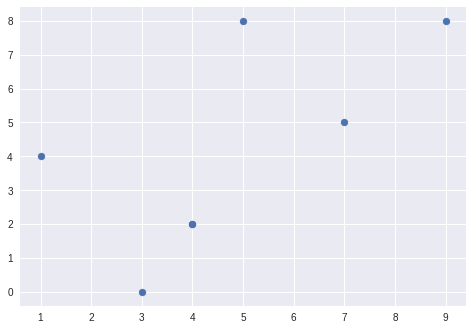

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()